In [1]:
import numpy as np

x = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(x, np.array([1, 2])) + 3

In [2]:
def relu(value: float) -> float:
    return value if value > 0 else 0.


In [1]:
import numpy as np

from nn.model import Sequential
from nn.layers import InputLayer, Dense, WeightsLayer
from nn.activations import relu, tanh
from nn.losses import categorical_cross_entropy


nn = Sequential(InputLayer(2),
                Dense(3, activation = relu),
                Dense(3, activation = relu),
                Dense(1, activation = tanh))

In [5]:
nn.weights.wl2


(1,3) : tanh

In [5]:
nn.forward(x[0])

array([2.10503691e-06])

In [7]:
a0 = nn.weights.wl0(x[0])
a1 = nn.weights.wl1(a0)
a2 = nn.weights.wl2(a1)

a2

array([1.06500204e-06])

In [8]:
a0 = np.dot(nn.weights.wl0.weights, x[0])
a1 = np.dot(nn.weights.wl1.weights, a0)
a2 = np.dot(nn.weights.wl2.weights, a1)
a2

array([1.06500204e-06])

In [9]:
nn.weights.wl2.weights

array([[0.00350996, 0.00300344, 0.00029405]])

In [6]:
loss = categorical_cross_entropy(y_hat, y)
loss

NameError: name 'y_hat' is not defined

In [12]:
if len(x.shape) ==1 :
    n_samples = 1
else:
    n_samples = x.shape[0]
    
print(n_samples)
    

4


In [16]:
print(nn.weights.wl0.weights, end='\n\n')
print(nn.weights.wl1.weights, end='\n\n')
print(nn.weights.wl2.weights)
print()
print(nn.weights.wl0.weights.shape, end='\n\n')
print(nn.weights.wl1.weights.shape, end='\n\n')
print(nn.weights.wl2.weights.shape)

[[-0.00293323 -0.00400611]
 [-0.00940533 -0.00304305]
 [-0.0097157  -0.00200822]]

[[0.00666465 0.00193964 0.00635281]
 [0.00333901 0.00588672 0.00714004]
 [0.00285756 0.00716681 0.00553861]]

[[0.00350996 0.00300344 0.00029405]]

(3, 2)

(3, 3)

(1, 3)


In [11]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [4]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
x = np.squeeze(x)
y = np.squeeze(y)

In [4]:

n_samples = 4
alpha = 0.01
for epoch in range(100):
    for x_i, y_i in zip(x, y):    
        y_hat = nn.forward(x_i)
        # error = categorical_cross_entropy(y_hat, y)
        error = y_hat - y_i
        
        
        da2 = np.dot(nn.weights.wl2.weights.T, error)
        dz2 = relu(da2, derivative=True)
        
        da1 = np.dot(nn.weights.wl1.weights.T, dz2)
        dz1 = relu(da1, derivative=True)
        
        da0 = np.dot(nn.weights.wl0.weights.T, dz1)
        dz0 = relu(da0, derivative=True)
        
        dw0 = np.dot(dz0, x_i.T)
        dw1 = np.dot(dz1, nn.weights.wl0.output.T)
        dw2 = np.dot(dz2, nn.weights.wl1.output.T)
        
        nn.weights.wl0.weights -= alpha * dw0
        nn.weights.wl1.weights -= alpha * dw1
        nn.weights.wl2.weights -= alpha * dw2
    print("Epoch {}: Error - {}".format(epoch, error))
        

 

Epoch 0: Error - [-11.]
Epoch 1: Error - [-11.]
Epoch 2: Error - [-11.]
Epoch 3: Error - [-11.]
Epoch 4: Error - [-11.]
Epoch 5: Error - [-11.]
Epoch 6: Error - [-11.]
Epoch 7: Error - [-11.]
Epoch 8: Error - [-11.]
Epoch 9: Error - [-11.]
Epoch 10: Error - [-11.]
Epoch 11: Error - [-11.]
Epoch 12: Error - [-11.]
Epoch 13: Error - [-11.]
Epoch 14: Error - [-11.]
Epoch 15: Error - [-11.]
Epoch 16: Error - [-11.]
Epoch 17: Error - [-11.]
Epoch 18: Error - [-11.]
Epoch 19: Error - [-11.]
Epoch 20: Error - [-11.]
Epoch 21: Error - [-11.]
Epoch 22: Error - [-11.]
Epoch 23: Error - [-11.]
Epoch 24: Error - [-11.]
Epoch 25: Error - [-11.]
Epoch 26: Error - [-11.]
Epoch 27: Error - [-11.]
Epoch 28: Error - [-11.]
Epoch 29: Error - [-11.]
Epoch 30: Error - [-11.]
Epoch 31: Error - [-11.]
Epoch 32: Error - [-11.]
Epoch 33: Error - [-11.]
Epoch 34: Error - [-11.]
Epoch 35: Error - [-11.]
Epoch 36: Error - [-11.]
Epoch 37: Error - [-11.]
Epoch 38: Error - [-11.]
Epoch 39: Error - [-11.]
Epoch 40: 

In [5]:
    
def backprob(error: np.ndarray, layer: WeightsLayer, alpha: float = 0.01):
    
    input_error = np.dot(layer.weights.T, error)
    
    dz = layer.activation(input_error, derivative=True)
    
    weights_error = np.dot(layer.input.T, dz)
    layer.weights -= (alpha * weights_error)
    
    return dz

In [18]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
x = np.squeeze(x)
y = np.squeeze(y)


In [42]:
list(nn.weights.__dict__.values())[:-1]

[(3,2) : <function tanh at 0x00000283FF09D360>,
 (1,3) : <function tanh at 0x00000283FF09D360>]

# Classification test

In [1]:
from sklearn.datasets import make_classification, make_blobs
import matplotlib.pyplot as plt
import numpy as np

from nn.model import Sequential
from nn.layers import InputLayer, Dense, WeightsLayer
from nn.activations import relu, tanh
from nn.losses import categorical_cross_entropy, mean_squared_error, BinaryCrossEntropy

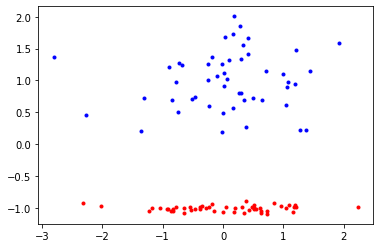

In [2]:
separable = False
while not separable:
    samples = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

In [5]:

n_split = int(np.round(len(samples[0]) * 0.7))
print(n_split)

x = samples[0]
y = samples[1].reshape(-1, 1)

x_train, x_test = x[:n_split], x[n_split:]
y_train, y_test = y[:n_split], y[n_split:]
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

70
(70, 2) (30, 2)
(70, 1) (30, 1)


In [6]:
nn = Sequential(InputLayer(2),
                Dense(3, activation = tanh),
                Dense(5, activation = tanh),
                Dense(3, activation = tanh),
                Dense(1, activation = tanh))

In [16]:

alpha = 0.01
y_hats = []
wl = list(nn.weights.__dict__.values())[:-1]
for epoch in range(10):
    y_buffer = []
    for x_i, y_i in zip(x_train, y_train):
        y_hat = nn.forward(x_i)
        y_buffer.append(y_hat)
        error = mean_squared_error([y_i], y_hat)

        for weight_layer in reversed(wl):
            # print('<{}>'.format(weight_layer))
            error = weight_layer.backprob(error)
    y_hats.append(y_buffer)   
    print("Epoch {}: Error - {}".format(epoch, error))

Epoch 0: Error - [0.60393607 0.59993919]
Epoch 1: Error - [0.55932234 0.55549657]
Epoch 2: Error - [0.5060455 0.502383 ]
Epoch 3: Error - [0.4437209  0.44024087]
Epoch 4: Error - [0.37686277 0.37361236]
Epoch 5: Error - [0.31282957 0.30985737]
Epoch 6: Error - [0.25743062 0.25475827]
Epoch 7: Error - [0.2127997  0.21041615]
Epoch 8: Error - [0.17835981 0.17623233]
Epoch 9: Error - [0.1524263  0.15051344]


In [9]:
y_test.reshape(1, -1)

array([[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 0]])

In [10]:
from nn.activations import apply_function_to_nparray

y_hat = np.array([])
for x_i in x_test:
    y_hat = np.append(y_hat, nn.forward(x_i))
  

print(y_hat)
y_hat = apply_function_to_nparray(y_hat, lambda value: 0 if value > 0 else 1)    


[-2.66641870e-04  4.17648690e-04  4.23960016e-04  1.28921367e-04
  2.16495174e-04  2.27992981e-04  4.01987028e-05  1.12348180e-04
  5.39501952e-05  4.17519492e-04 -3.89659496e-04 -2.86399632e-04
 -3.40429478e-05 -1.14812999e-04 -1.33964955e-04  4.71608496e-05
  2.62522498e-04  2.38739491e-04 -2.81358886e-04  7.45311994e-05
  2.51265875e-04  2.11828641e-04 -2.61953226e-04 -3.86156697e-04
  3.17607428e-04 -2.12490755e-04 -6.47440500e-06 -1.16137665e-04
 -3.70432658e-04 -1.83999366e-04]


In [11]:
y_hat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1])

In [12]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_hat)
cm

array([[ 1, 11],
       [15,  3]], dtype=int64)

In [13]:
report = metrics.classification_report(y_test, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.06      0.08      0.07        12
           1       0.21      0.17      0.19        18

    accuracy                           0.13        30
   macro avg       0.14      0.12      0.13        30
weighted avg       0.15      0.13      0.14        30



In [18]:
y_hats[0]

[array([-0.00023884]),
 array([0.00061223]),
 array([0.00022872]),
 array([0.00017064]),
 array([-5.1173114e-05]),
 array([0.00049413]),
 array([-0.00054763]),
 array([0.00038744]),
 array([-0.00121707]),
 array([0.00053291]),
 array([0.00175837]),
 array([-0.00114266]),
 array([0.00174578]),
 array([0.00105292]),
 array([-0.00037016]),
 array([0.00029703]),
 array([0.00030283]),
 array([0.00058845]),
 array([-0.00017975]),
 array([7.92981348e-05]),
 array([0.00044626]),
 array([0.00059391]),
 array([-5.44917906e-05]),
 array([-0.00033236]),
 array([-0.00073839]),
 array([0.00175461]),
 array([0.00036035]),
 array([-5.07625346e-05]),
 array([0.00042779]),
 array([0.0003355]),
 array([-0.00076375]),
 array([-0.0012307]),
 array([0.00059631]),
 array([-0.00110056]),
 array([-0.00111818]),
 array([0.00317893]),
 array([-0.00285985]),
 array([-0.00061015]),
 array([0.00307326]),
 array([0.00096499]),
 array([0.00353997]),
 array([-6.20656803e-05]),
 array([0.0006612]),
 array([0.00019183])

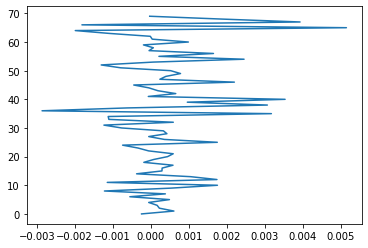

In [23]:
plt.plot(y_hats[0], range(0, 70))

## Activatioins test

In [1]:
from nn.activations import relu
from nn.losses import BinaryCrossEntropy
import numpy as np

In [2]:
a = np.array([1,-1, 2,-2, 3])
relu(a)

array([1., 0., 2., 0., 3.])

In [25]:
BinaryCrossEntropy(0, -8.11676177e-08)

nan

In [31]:
np.tanh([0.9963555249786387, -0.5288796417702989])

array([ 0.76005932, -0.48452422])

In [60]:
Y_true = [1,1,2,2,4]  # Y_true = Y (original values)
  
# Calculated values
Y_pred = [0.6,1.29,1.99,2.69,3.4]
mean_squared_error(Y_true, Y_pred)

0.21606

In [1]:
from nn.utils import set_repr

In [2]:
@set_repr("increment")
def foo(a: int):
    return a + 1 

In [3]:
foo

increment

In [4]:
def boo(a: int):
    return a - 1

boo.__repr__ = 'decrement'

In [44]:
boo

<function __main__.boo(a: int)>